In [1]:
import json
import yaml
import math
import numpy as np
from mpl_toolkits import mplot3d  # pylint: disable=W0611
from matplotlib import pyplot as plt
from matplotlib import cm
import matplotlib
from scipy.spatial.transform import Rotation
import os
import math

In [2]:
import os, sys
sys.path.append(os.path.join(os.getcwd(), '..'))
import plot_trajectories
import get_experiment_results

# Parameterization Studies
## num_frames_per_background

In [4]:
def getExperimentResults(yaml_file_path):
    dir_final_name = os.path.basename(yaml_file_path)[:-len(".yaml")]
    with open(yaml_file_path, 'r') as fr:
        yaml_data = yaml.load(fr, yaml.FullLoader)
    base_experiments_dir = os.path.join(os.getenv("HOME"), 'datasets',
                                        dir_final_name) 
    experiments_results = get_experiment_results.getExperimentResults(
        base_experiments_dir)
    return experiments_results

def plot_all_metrics_in_a_single_image(yaml_file_path, x_variable_name, x_variable_sorted, xvals):
    all_trajectories = plot_trajectories.getAllExperimentTrajectories(
        yaml_file_path=yaml_file_path, post_mult=True)
    experiments_results = getExperimentResults(yaml_file_path)
    keys = all_trajectories.keys()
    fig, axs = plt.subplots(1, 2, figsize=(16, 9))    
    error_metric = 'RMSE [m]'
    evaluations = [
            float(er['panmap'][error_metric]) for er in experiments_results
    ]
    traj_error_metric = 'og_rmse_pos[m]'
    evaluations_trajectory = [
            float(er['trajectory'][traj_error_metric]) for er in experiments_results
    ]
    # re arrange evaluations to be 1-1 with x_variable_sorted
    # Mapping error
    axs[0].plot(xvals, evaluations, linewidth=4, marker='D', markerfacecolor='red')
    axs[0].set_ylabel(error_metric)
    axs[0].set_xlabel(x_variable_name)
    axs[0].title.set_text('Mapping Error')
    axs[0].grid()
    # Trajectory error
    axs[1].plot(xvals, evaluations_trajectory, linewidth=4, marker='D', markerfacecolor='red')
    axs[1].set_ylabel(error_metric)
    axs[1].set_xlabel(x_variable_name)
    axs[1].title.set_text('Trajectory Error')
    axs[1].grid()
    plt.suptitle(f"Parameter study of {x_variable_name}", fontsize=18)
    fig.tight_layout()
    return fig

# def plot2D_all_metrics_in_a_single_image(yaml_file_path, xy_variable_names, xyvals_non_sorted_names, xy_variable_sorted, xyvals):
#     # fig, axs = plt.subplots(1, 2, figsize=(16, 9))
#     experiments_results = getExperimentResults(yaml_file_path)
#     error_metric = 'RMSE [m]'
#     evaluations = [
#             float(er['panmap'][error_metric]) for er in experiments_results
#     ]
#     traj_error_metric = 'og_rmse_pos[m]'
#     evaluations_trajectory = [
#             float(er['trajectory'][traj_error_metric]) for er in experiments_results
#     ]
#     fig = plt.figure(figsize=plt.figaspect(0.5))
#     xyvals = np.array(xyvals)
#     X = np.unique(xyvals[:, 0])
#     Y = np.unique(xyvals[:, 1])
#     x_shape = len(X)
#     y_shape = len(Y)
#     X,Y = np.meshgrid(X,Y)
#     ax = fig.add_subplot(1, 2, 1, projection='3d')
#     idx = []
#     for val in xyvals_non_sorted_names:
#       idx.append(xy_variable_sorted.index(val))

#     Zm = np.array([evaluations[i] for i in idx])
#     Zm = np.reshape(Zm, X.shape)
#     Zt = np.array([evaluations_trajectory[i] for i in idx])
#     Zt = np.reshape(Zt, (x_shape, y_shape))
#     print(X, Y, Zt)
#     surf = ax.plot_surface(X, Y, Zm, rstride=1, cstride=1, cmap=cm.coolwarm,
#                           linewidth=0, antialiased=True)

#     plt.suptitle(f"Parameter study of {xy_variable_names[0]} VS {xy_variable_names[1]}", fontsize=18)
#     fig.tight_layout()
#     return fig
def plot2D_all_metrics_in_a_single_image(yaml_file_path, xy_variable_names, xyvals_non_sorted_names, xy_variable_sorted, xyvals):
    # fig, axs = plt.subplots(1, 2, figsize=(16, 9))
    experiments_results = getExperimentResults(yaml_file_path)
    error_metric = 'RMSE [m]'
    evaluations = [
            float(er['panmap'][error_metric]) for er in experiments_results
    ]
    traj_error_metric = 'og_rmse_pos[m]'
    evaluations_trajectory = [
            float(er['trajectory'][traj_error_metric]) for er in experiments_results
    ]
    fig = plt.figure(figsize=plt.figaspect(0.5))
    xyvals = np.array(xyvals)
    X = xyvals[:, 0]
    Y = xyvals[:, 1]
    idx = []
    for val in xyvals_non_sorted_names:
        idx.append(xy_variable_sorted.index(val))

    Zm = np.array([evaluations[i] for i in idx])
    Zt = np.array([evaluations_trajectory[i] for i in idx])
    print(evaluations)
    print(X, Y, Zm)
    width = depth = 1
    colors = ['cyan', 'cadetblue', 'deepskyblue', 'dodgerblue']*3
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.bar3d(X, Y, np.zeros_like(Zt), width, depth, Zm, shade=True, color=colors, alpha=0.5)
    ax.set_xlabel(xy_variable_names[0])
    ax.set_ylabel(xy_variable_names[1])
    ax.set_zlabel(error_metric)
    
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.bar3d(X, Y, np.zeros_like(Zt), width, depth, Zt, shade=True, color=colors, alpha=0.5)
    ax.set_xlabel(xy_variable_names[0])
    ax.set_ylabel(xy_variable_names[1])
    ax.set_zlabel(error_metric)
    # surf = ax.plot_surface(X, Y, Zm, rstride=1, cstride=1, cmap=cm.coolwarm,
    #                       linewidth=0, antialiased=True)
    
    plt.suptitle(f"Parameter study of {xy_variable_names[0]} VS {xy_variable_names[1]}", fontsize=18)
    fig.tight_layout()
    return fig

def multiplot(yaml_file_path, xy_variable_names, xyvals_non_sorted_names, xy_variable_sorted, xyvals):
    experiments_results = getExperimentResults(yaml_file_path)
    error_metric = 'RMSE [m]'
    evaluations = [
              float(er['panmap'][error_metric]) for er in experiments_results
    ]
    traj_error_metric = 'og_rmse_pos[m]'
    evaluations_trajectory = [
              float(er['trajectory'][traj_error_metric]) for er in experiments_results
    ]
    idx = []
    for val in xyvals_non_sorted_names:
        idx.append(xy_variable_sorted.index(val))
    xyvals = np.array(xyvals)
    X = np.unique(xyvals[:, 0])
    Y = np.unique(xyvals[:, 1])
    Zm = np.array(evaluations)
    Zt = np.array(evaluations_trajectory)

    Zm = np.reshape(Zm, (len(X),len(Y)))
    Zt = np.reshape(Zt, (len(X),len(Y)))
    fig, axs = plt.subplots(1, 2, figsize=(16, 9))
    colors = ['cyan', 'cadetblue', 'deepskyblue', 'dodgerblue']
    markers = ['D', 'h', '+', 'x', 'h']
    # Mapping error
    for i in range(len(X)):
      axs[0].plot(Y, Zm[i,:], linewidth=4, marker=markers[i], color=colors[i], label=f'{xy_variable_names[0]}={X[i]}', markerfacecolor='red', markersize=8)
    axs[0].set_ylabel(error_metric)
    axs[0].set_xlabel(xy_variable_names[1])
    axs[0].title.set_text('Mapping Error')
    axs[0].grid()
    axs[0].legend()
    # Trajectory error
    for i in range(len(X)):
      axs[1].plot(Y, Zt[i,:], linewidth=4, marker=markers[i], color=colors[i], label=f'{xy_variable_names[0]}={X[i]}', markerfacecolor='red', markersize=8)
    axs[1].set_ylabel(error_metric)
    axs[1].set_xlabel(xy_variable_names[1])
    axs[1].title.set_text('Trajectory Error')
    axs[1].grid()
    axs[1].legend()
    plt.suptitle(f"Parameter study of {xy_variable_names[0]} VS {xy_variable_names[1]}", fontsize=18)
    fig.tight_layout()
    return fig


In [ ]:
# all_trajectories = plot_trajectories.getAllExperimentTrajectories(yaml_file_path='/home/ioannis/catkin_ws/src/panoptic_mapping/panoptic_mapping_utils/config/evaluation_scenarios/ablation_study/num_frames_per_background.yaml', 
#                                                                   post_mult=True)
xval_names = ['n_5', 'n_6', 'n_8', 'n_10', 'n_12', 'n_14', 'n_16', 'n_18', 'n_20', 'n_22']
fg = plot_all_metrics_in_a_single_image(
  '/home/ioannis/catkin_ws/src/panoptic_mapping/panoptic_mapping_utils/config/evaluation_scenarios/ablation_study/num_frames_per_background.yaml', 
  'number of frames', 
  xval_names,
  xvals = [int(n[2:]) for n in xval_names])
fg.savefig('/home/ioannis/num_frames_per_background.pdf')

In [ ]:
yaml_file_path='/home/ioannis/catkin_ws/src/panoptic_mapping/panoptic_mapping_utils/config/evaluation_scenarios/ablation_study/num_backgrounds.yaml'
# all_trajectories = plot_trajectories.getAllExperimentTrajectories(yaml_file_path, 
#                                                                   post_mult=True)
# print(all_trajectories.keys())
xyvals = [[1,8], [3,10], [3,8], [3,12], [1,10], [5,8], [5,10], [1,12], [5,6], [3,6], [5,12], [1,6]]
xyvals_non_sorted_names = [
  f"submaps_to_merge_{xy[0]}_ticks_{xy[1]}" for xy in xyvals
]
xyvals.sort()
xyval_names = [
  f"submaps_to_merge_{xy[0]}_ticks_{xy[1]}" for xy in xyvals
]
fg = multiplot(
  yaml_file_path,
  ['backgrounds number', 'frames number'],
  xyvals_non_sorted_names,
  xyval_names,
  xyvals)
fg.savefig('/home/ioannis/num_backgrounds.pdf')

In [ ]:

k1 = ['num_iterations_1000', 'num_iterations_2000', 'num_iterations_5000', 'num_iterations_10000']
k2 = ['min_points_500', 'min_points_1000', 'min_points_2000', 'min_points_4000']
k3 = ['epsilon_0_01', 'epsilon_0_02', 'epsilon_0_05', 'epsilon_0_1']
k4 = ['cluster_epsilon_0_01', 'cluster_epsilon_0_02', 'cluster_epsilon_0_05', 'cluster_epsilon_0_1']
vals = [
        1000,
        2000,
        4000,
        5000,
        500,
        1000,
        2000,
        4000,
        0.01,
        0.02,
        0.05,
        0.1,
        0.01,
        0.02,
        0.05,
        0.1
]
yaml_file_path = '/home/ioannis/catkin_ws/src/panoptic_mapping/panoptic_mapping_utils/config/evaluation_scenarios/ablation_study/tunning_plane_collection.yaml'
experiments_results = getExperimentResults(yaml_file_path)
error_metric = 'RMSE [m]'
evaluations = [
        float(er['panmap'][error_metric]) for er in experiments_results
]
traj_error_metric = 'og_rmse_pos[m]'
evaluations_trajectory = [
        float(er['trajectory'][traj_error_metric]) for er in experiments_results
]
print(f'\n'.join([f'${v[0]}$ & ${round(v[1],3)}$ & ${round(v[2],3)}$\\\\' for v in zip(vals, evaluations, evaluations_trajectory)]))


/home/ioannis/datasets/voxgraph_plane_constraints/experiment1
{'ground_truth_tr': '/home/ioannis/datasets/voxgraph_plane_constraints/experiment1/generated_path.txt', 'optimized_tr': '/home/ioannis/datasets/voxgraph_plane_constraints/experiment1/trajectory.in', 'voxgraph_tr': '/home/ioannis/datasets/voxgraph_plane_constraints/experiment1/voxgraph_traj.bag'}
/home/ioannis/datasets/voxgraph_plane_constraints/experiment6
{'ground_truth_tr': '/home/ioannis/datasets/voxgraph_plane_constraints/experiment6/generated_path.txt', 'optimized_tr': '/home/ioannis/datasets/voxgraph_plane_constraints/experiment6/trajectory.in', 'voxgraph_tr': '/home/ioannis/datasets/voxgraph_plane_constraints/experiment6/voxgraph_traj.bag'}
/home/ioannis/datasets/voxgraph_plane_constraints/experiment5
{'ground_truth_tr': '/home/ioannis/datasets/voxgraph_plane_constraints/experiment5/generated_path.txt', 'optimized_tr': '/home/ioannis/datasets/voxgraph_plane_constraints/experiment5/trajectory.in', 'voxgraph_tr': '/home

[2022-03-27 06:28:27] - run_evaluations - {line:28} INFO - ['experiment0', 'experiment1', 'experiment2', 'experiment3', 'experiment4', 'experiment5', 'experiment6', 'experiment7', 'experiment8', 'experiment9']
[2022-03-27 06:28:27] - run_evaluations - {line:52} INFO - opened /home/ioannis/datasets/voxgraph_plane_constraints/experiment0/trajectory.out
[2022-03-27 06:28:27] - run_evaluations - {line:63} INFO - opened /home/ioannis/datasets/voxgraph_plane_constraints/experiment0/runWithVoxgraph_plane_collectionfactor_0_1_evaluation_data.csv
[2022-03-27 06:28:27] - run_evaluations - {line:36} INFO - {'trajectory': {'dg_mean_pos[m]': '1.35393', 'dg_mean_rot[rad]': '0.15266', 'dg_stddev_pos[m]': '1.90458', 'dg_stddev_rot[rad]': '0.197141', 'dg_rmse_pos[m]': '1.90283', 'dg_rmse_rot[rad]': '0.19696', 'dg_num_points': '544', 'og_mean_pos[m]': '0.547935', 'og_mean_rot[rad]': '0.0262261', 'og_stddev_pos[m]': '0.708234', 'og_stddev_rot[rad]': '0.0449269', 'og_rmse_pos[m]': '0.707583', 'og_rmse_rot

/home/ioannis/datasets/voxgraph_plane_constraints/experiment4
{'ground_truth_tr': '/home/ioannis/datasets/voxgraph_plane_constraints/experiment4/generated_path.txt', 'optimized_tr': '/home/ioannis/datasets/voxgraph_plane_constraints/experiment4/trajectory.in', 'voxgraph_tr': '/home/ioannis/datasets/voxgraph_plane_constraints/experiment4/voxgraph_traj.bag'}
/home/ioannis/datasets/voxgraph_plane_constraints/experiment0
{'ground_truth_tr': '/home/ioannis/datasets/voxgraph_plane_constraints/experiment0/generated_path.txt', 'optimized_tr': '/home/ioannis/datasets/voxgraph_plane_constraints/experiment0/trajectory.in', 'voxgraph_tr': '/home/ioannis/datasets/voxgraph_plane_constraints/experiment0/voxgraph_traj.bag'}


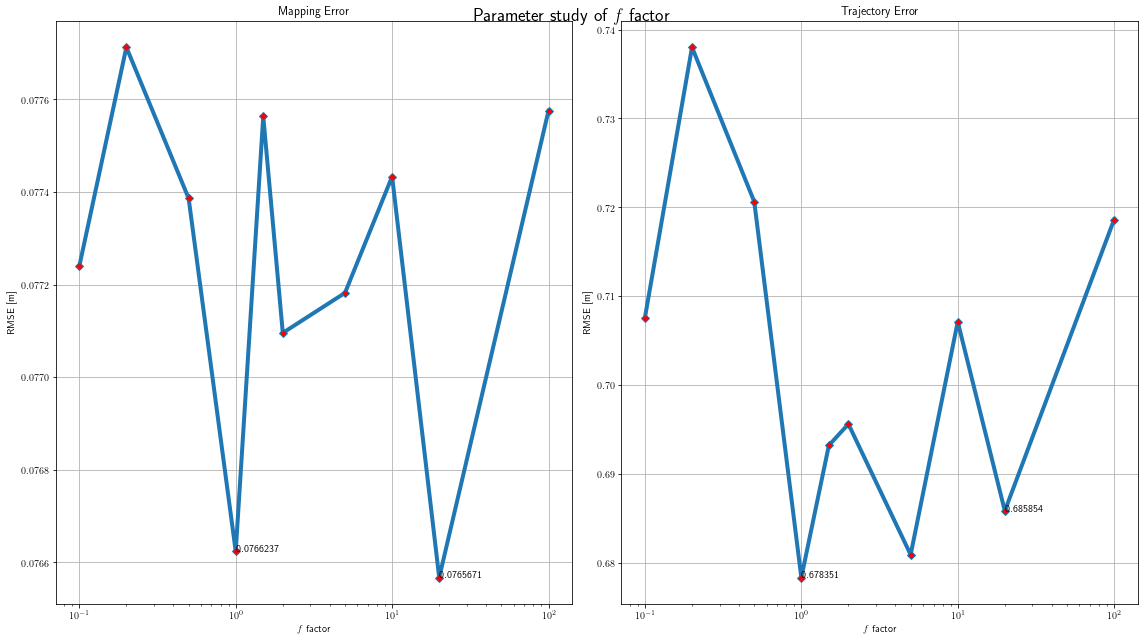

In [39]:
f_vals = [0.1,0.2,0.5,1.0,1.5,2.0,5.0,10.0,20.0,100.0]
def plotAnotatedMetrics(yaml_file_path, x_variable_name, x_variable_sorted, xvals):
    all_trajectories = plot_trajectories.getAllExperimentTrajectories(
        yaml_file_path=yaml_file_path, post_mult=True)
    experiments_results = getExperimentResults(yaml_file_path)
    keys = all_trajectories.keys()
    fig, axs = plt.subplots(1, 2, figsize=(16, 9))    
    error_metric = 'RMSE [m]'
    evaluations = [
            float(er['panmap'][error_metric]) for er in experiments_results
    ]
    traj_error_metric = 'og_rmse_pos[m]'
    evaluations_trajectory = [
            float(er['trajectory'][traj_error_metric]) for er in experiments_results
    ]
    # re arrange evaluations to be 1-1 with x_variable_sorted
    # Mapping error
    axs[0].plot(xvals, evaluations, linewidth=4, marker='D', markerfacecolor='red')
    axs[0].set_xscale('log')
    axs[0].set_ylabel(error_metric)
    axs[0].set_xlabel(x_variable_name)
    axs[0].title.set_text('Mapping Error')
    axs[0].grid()
    axs[0].annotate(f"{evaluations[3]}", (xvals[3], evaluations[3]))
    axs[0].annotate(f"{evaluations[8]}", (xvals[8], evaluations[8]))
    # Trajectory error
    axs[1].plot(xvals, evaluations_trajectory, linewidth=4, marker='D', markerfacecolor='red')
    axs[1].set_xscale('log')
    axs[1].set_ylabel(error_metric)
    axs[1].set_xlabel(x_variable_name)
    axs[1].title.set_text('Trajectory Error')
    axs[1].grid()
    axs[1].annotate(f"{evaluations_trajectory[3]}", (xvals[3], evaluations_trajectory[3]))
    axs[1].annotate(f"{evaluations_trajectory[8]}", (xvals[8], evaluations_trajectory[8]))    
    plt.suptitle(f"Parameter study of {x_variable_name}", fontsize=18)
    fig.tight_layout()
    return fig

fg = plotAnotatedMetrics(
  '/home/ioannis/catkin_ws/src/panoptic_mapping/panoptic_mapping_utils/config/evaluation_scenarios/voxgraph_plane_constraints.yaml', 
  '$f$ factor', 
  [],
  xvals = f_vals)
fg.savefig('/home/ioannis/plane_constraints_factor.pdf')

# Ablation Study

In [ ]:
plot_trajectories.plotErrorForManyExperiments(all_trajectories, 'Trajectory Interpolation Evaluation')
plot_trajectories.plotXYZErrorsPerAxis(**all_trajectories['moderate_linear'])
plot_trajectories.plotXYZErrorsPerAxis(**all_trajectories['moderate_none'])

/home/ioannis/datasets/interpolation_experiments/experiment1
{'ground_truth_tr': '/home/ioannis/datasets/interpolation_experiments/experiment1/generated_path.txt', 'optimized_tr': '/home/ioannis/datasets/interpolation_experiments/experiment1/trajectory.in', 'voxgraph_tr': '/home/ioannis/datasets/interpolation_experiments/experiment1/voxgraph_traj.bag'}
/home/ioannis/datasets/interpolation_experiments/experiment6
{'ground_truth_tr': '/home/ioannis/datasets/interpolation_experiments/experiment6/generated_path.txt', 'optimized_tr': '/home/ioannis/datasets/interpolation_experiments/experiment6/trajectory.in', 'voxgraph_tr': '/home/ioannis/datasets/interpolation_experiments/experiment6/voxgraph_traj.bag'}
/home/ioannis/datasets/interpolation_experiments/experiment5
{'ground_truth_tr': '/home/ioannis/datasets/interpolation_experiments/experiment5/generated_path.txt', 'optimized_tr': '/home/ioannis/datasets/interpolation_experiments/experiment5/trajectory.in', 'voxgraph_tr': '/home/ioannis/da

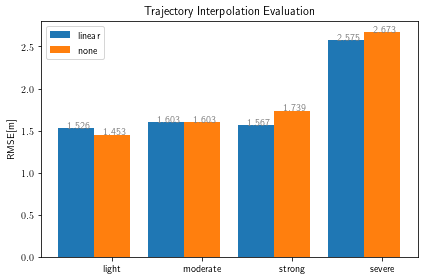

<Figure size 432x288 with 0 Axes>

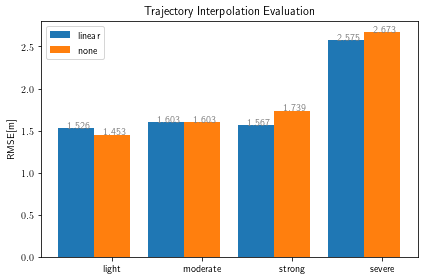

In [50]:
all_trajectories = plot_trajectories.getAllExperimentTrajectories(yaml_file_path='/home/ioannis/catkin_ws/src/panoptic_mapping/panoptic_mapping_utils/config/evaluation_scenarios/interpolation_experiments.yaml',
                                                                  post_mult=True)

plot_trajectories.plotErrorForManyExperiments(all_trajectories, 'Trajectory Interpolation Evaluation')

In [45]:
yaml_file_path='/home/ioannis/catkin_ws/src/panoptic_mapping/panoptic_mapping_utils/config/evaluation_scenarios/pm_drift_behavior.yaml'
experiments_results = getExperimentResults(yaml_file_path)

# total_errors = plot_trajectories.getErrorFromManyExperiments(all_trajectories)


[2022-03-27 13:54:33] - run_evaluations - {line:28} INFO - ['experiment0', 'experiment1', 'experiment2', 'experiment3']
[2022-03-27 13:54:33] - run_evaluations - {line:52} INFO - opened /home/ioannis/datasets/pm_drift_behavior/experiment0/trajectory.out
[2022-03-27 13:54:33] - run_evaluations - {line:63} INFO - opened /home/ioannis/datasets/pm_drift_behavior/experiment0/runWithVoxgraph_drift_behaviorlight_evaluation_data.csv
[2022-03-27 13:54:33] - run_evaluations - {line:36} INFO - {'trajectory': {'dg_mean_pos[m]': '0.339134', 'dg_mean_rot[rad]': '0.0381651', 'dg_stddev_pos[m]': '0.476154', 'dg_stddev_rot[rad]': '0.0492853', 'dg_rmse_pos[m]': '0.475716', 'dg_rmse_rot[rad]': '0.04924', 'dg_num_points': '544', 'og_mean_pos[m]': '0.339134', 'og_mean_rot[rad]': '0.0381651', 'og_stddev_pos[m]': '0.476154', 'og_stddev_rot[rad]': '0.0492853', 'og_rmse_pos[m]': '0.475716', 'og_rmse_rot[rad]': '0.04924', 'og_num_points[m]': '544'}, 'panmap': {'MeanError [m]': '0.0646385', 'StdError [m]': '0.03

In [47]:
print(experiments_results)


[{'trajectory': {'dg_mean_pos[m]': '0.339134', 'dg_mean_rot[rad]': '0.0381651', 'dg_stddev_pos[m]': '0.476154', 'dg_stddev_rot[rad]': '0.0492853', 'dg_rmse_pos[m]': '0.475716', 'dg_rmse_rot[rad]': '0.04924', 'dg_num_points': '544', 'og_mean_pos[m]': '0.339134', 'og_mean_rot[rad]': '0.0381651', 'og_stddev_pos[m]': '0.476154', 'og_stddev_rot[rad]': '0.0492853', 'og_rmse_pos[m]': '0.475716', 'og_rmse_rot[rad]': '0.04924', 'og_num_points[m]': '544'}, 'panmap': {'MeanError [m]': '0.0646385', 'StdError [m]': '0.0336851', 'RMSE [m]': '0.0734471', 'TotalPoints [1]': '8605242', 'UnknownPoints [1]': '3759546', 'TruncatedPoints [1]': '0', None: ['4570640']}}, {'trajectory': {'dg_mean_pos[m]': '0.678139', 'dg_mean_rot[rad]': '0.0763301', 'dg_stddev_pos[m]': '0.952832', 'dg_stddev_rot[rad]': '0.0985707', 'dg_rmse_pos[m]': '0.951956', 'dg_rmse_rot[rad]': '0.09848', 'dg_num_points': '544', 'og_mean_pos[m]': '0.678139', 'og_mean_rot[rad]': '0.0763301', 'og_stddev_pos[m]': '0.952832', 'og_stddev_rot[ra

[2022-03-27 14:09:34] - run_evaluations - {line:28} INFO - ['experiment0', 'experiment1', 'experiment2', 'experiment3']
[2022-03-27 14:09:34] - run_evaluations - {line:52} INFO - opened /home/ioannis/datasets/pm_drift_behavior/experiment0/trajectory.out
[2022-03-27 14:09:34] - run_evaluations - {line:63} INFO - opened /home/ioannis/datasets/pm_drift_behavior/experiment0/runWithVoxgraph_drift_behaviorlight_evaluation_data.csv
[2022-03-27 14:09:34] - run_evaluations - {line:36} INFO - {'trajectory': {'dg_mean_pos[m]': '0.339134', 'dg_mean_rot[rad]': '0.0381651', 'dg_stddev_pos[m]': '0.476154', 'dg_stddev_rot[rad]': '0.0492853', 'dg_rmse_pos[m]': '0.475716', 'dg_rmse_rot[rad]': '0.04924', 'dg_num_points': '544', 'og_mean_pos[m]': '0.339134', 'og_mean_rot[rad]': '0.0381651', 'og_stddev_pos[m]': '0.476154', 'og_stddev_rot[rad]': '0.0492853', 'og_rmse_pos[m]': '0.475716', 'og_rmse_rot[rad]': '0.04924', 'og_num_points[m]': '544'}, 'panmap': {'MeanError [m]': '0.0646385', 'StdError [m]': '0.03

/home/ioannis/datasets/pm_drift_behavior/experiment1
{'ground_truth_tr': '/home/ioannis/datasets/pm_drift_behavior/experiment1/generated_path.txt', 'optimized_tr': '/home/ioannis/datasets/pm_drift_behavior/experiment1/trajectory.in'}
/home/ioannis/datasets/pm_drift_behavior/runWithVoxgraph_drift_behaviorlight1648373926.072597.png
/home/ioannis/datasets/pm_drift_behavior/experiment2
{'ground_truth_tr': '/home/ioannis/datasets/pm_drift_behavior/experiment2/generated_path.txt', 'optimized_tr': '/home/ioannis/datasets/pm_drift_behavior/experiment2/trajectory.in'}
/home/ioannis/datasets/pm_drift_behavior/experiment3
{'ground_truth_tr': '/home/ioannis/datasets/pm_drift_behavior/experiment3/generated_path.txt', 'optimized_tr': '/home/ioannis/datasets/pm_drift_behavior/experiment3/trajectory.in'}
/home/ioannis/datasets/pm_drift_behavior/experiment0
{'ground_truth_tr': '/home/ioannis/datasets/pm_drift_behavior/experiment0/generated_path.txt', 'optimized_tr': '/home/ioannis/datasets/pm_drift_beh

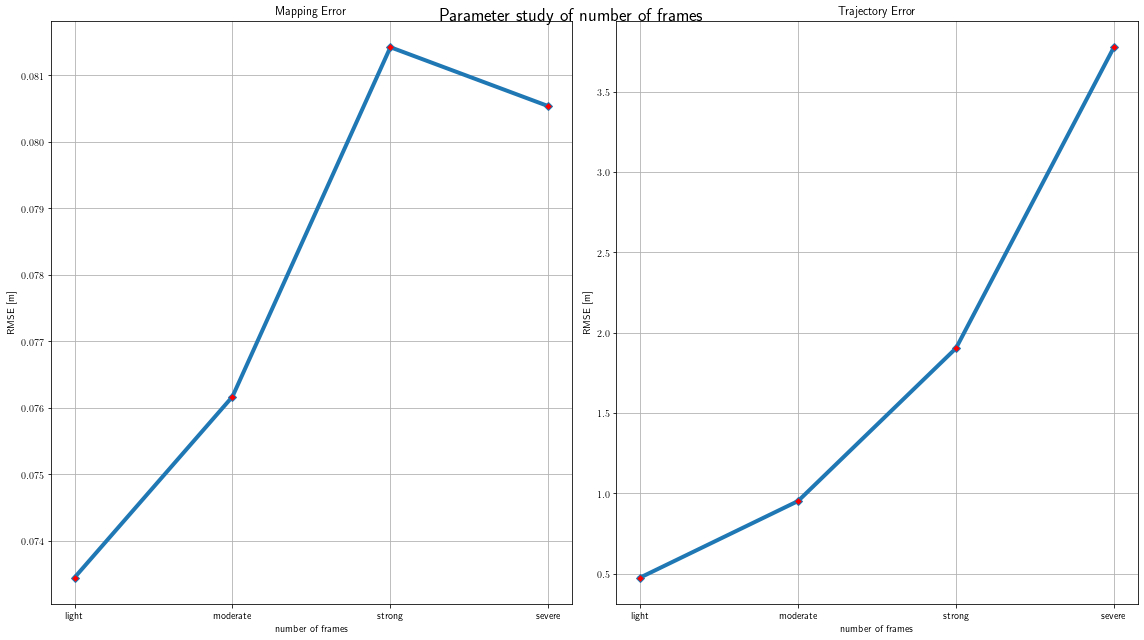

In [48]:
xval_names = ['n_5', 'n_6', 'n_8', 'n_10', 'n_12', 'n_14', 'n_16', 'n_18', 'n_20', 'n_22']
yaml_file_path='/home/ioannis/catkin_ws/src/panoptic_mapping/panoptic_mapping_utils/config/evaluation_scenarios/pm_drift_behavior.yaml'
fg = plot_all_metrics_in_a_single_image(
  yaml_file_path, 
  'number of frames', 
  [],
  xvals = ['light', 'moderate', 'strong', 'severe'])
# fg.savefig('/home/ioannis/num_frames_per_background.pdf')

[2022-03-27 14:25:41] - run_evaluations - {line:28} INFO - ['experiment0', 'experiment1', 'experiment2', 'experiment3']
[2022-03-27 14:25:41] - run_evaluations - {line:52} INFO - opened /home/ioannis/datasets/pm_drift_behavior/experiment0/trajectory.out
[2022-03-27 14:25:41] - run_evaluations - {line:63} INFO - opened /home/ioannis/datasets/pm_drift_behavior/experiment0/runWithVoxgraph_drift_behaviorlight_evaluation_data.csv
[2022-03-27 14:25:41] - run_evaluations - {line:36} INFO - {'trajectory': {'dg_mean_pos[m]': '0.339134', 'dg_mean_rot[rad]': '0.0381651', 'dg_stddev_pos[m]': '0.476154', 'dg_stddev_rot[rad]': '0.0492853', 'dg_rmse_pos[m]': '0.475716', 'dg_rmse_rot[rad]': '0.04924', 'dg_num_points': '544', 'og_mean_pos[m]': '0.339134', 'og_mean_rot[rad]': '0.0381651', 'og_stddev_pos[m]': '0.476154', 'og_stddev_rot[rad]': '0.0492853', 'og_rmse_pos[m]': '0.475716', 'og_rmse_rot[rad]': '0.04924', 'og_num_points[m]': '544'}, 'panmap': {'MeanError [m]': '0.0646385', 'StdError [m]': '0.03

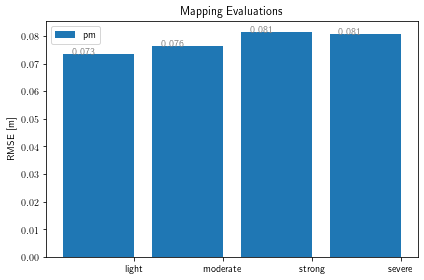

<Figure size 432x288 with 0 Axes>

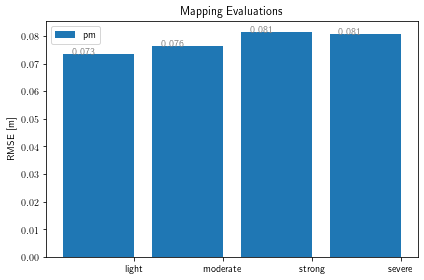

In [5]:
yaml_file_path='/home/ioannis/catkin_ws/src/panoptic_mapping/panoptic_mapping_utils/config/evaluation_scenarios/pm_drift_behavior.yaml'
plot_trajectories.plotMappingErrorForManyExperiments(yaml_file_path, labels=['pm'], error_type='RMSE [m]')

[2022-05-04 18:44:07] - run_evaluations - {line:28} INFO - ['experiment0', 'experiment1', 'experiment2', 'experiment3', 'experiment4', 'experiment5', 'experiment6', 'experiment7', 'experiment8', 'experiment9', 'experiment10', 'experiment11', 'experiment12', 'experiment13', 'experiment14', 'experiment15', 'experiment16', 'experiment17', 'experiment18', 'experiment19']
[2022-05-04 18:44:07] - run_evaluations - {line:52} INFO - opened /home/ioannis/datasets/different_configurations_various_drifts/experiment0/trajectory.out
[2022-05-04 18:44:07] - run_evaluations - {line:63} INFO - opened /home/ioannis/datasets/different_configurations_various_drifts/experiment0/runWithVoxgraph_drift_behaviorpm_light_evaluation_data.csv
[2022-05-04 18:44:07] - run_evaluations - {line:36} INFO - {'trajectory': {'dg_mean_pos[m]': '0.339134', 'dg_mean_rot[rad]': '0.0381651', 'dg_stddev_pos[m]': '0.476154', 'dg_stddev_rot[rad]': '0.0492853', 'dg_rmse_pos[m]': '0.475716', 'dg_rmse_rot[rad]': '0.04924', 'dg_num_

<Figure size 4608x1944 with 0 Axes>

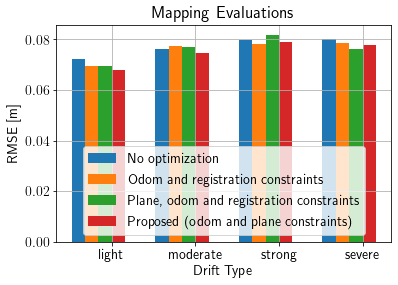

In [3]:
matplotlib.rcParams.update({'font.size': 14})
yaml_file_path='/home/ioannis/catkin_ws/src/panoptic_mapping/panoptic_mapping_utils/config/evaluation_scenarios/ablation_study/different_configurations_various_drifts.yaml'
fg = plot_trajectories.plotMappingErrorForManyExperiments(yaml_file_path, labels=['No optimization', 'Odom and registration constraints', 'Plane, odom and registration constraints', '_skip_', 'Proposed (odom and plane constraints)'], error_type='RMSE [m]', use_label_numbers=False)
fg.savefig('/home/ioannis/mapping_errors2.png')

[2022-05-04 18:49:03] - run_evaluations - {line:28} INFO - ['experiment0', 'experiment1', 'experiment2', 'experiment3', 'experiment4', 'experiment5', 'experiment6', 'experiment7', 'experiment8', 'experiment9', 'experiment10', 'experiment11', 'experiment12', 'experiment13', 'experiment14', 'experiment15', 'experiment16', 'experiment17', 'experiment18', 'experiment19']
[2022-05-04 18:49:03] - run_evaluations - {line:52} INFO - opened /home/ioannis/datasets/different_configurations_various_drifts/experiment0/trajectory.out
[2022-05-04 18:49:03] - run_evaluations - {line:63} INFO - opened /home/ioannis/datasets/different_configurations_various_drifts/experiment0/runWithVoxgraph_drift_behaviorpm_light_evaluation_data.csv
[2022-05-04 18:49:03] - run_evaluations - {line:36} INFO - {'trajectory': {'dg_mean_pos[m]': '0.339134', 'dg_mean_rot[rad]': '0.0381651', 'dg_stddev_pos[m]': '0.476154', 'dg_stddev_rot[rad]': '0.0492853', 'dg_rmse_pos[m]': '0.475716', 'dg_rmse_rot[rad]': '0.04924', 'dg_num_

skipped label


<Figure size 432x288 with 0 Axes>

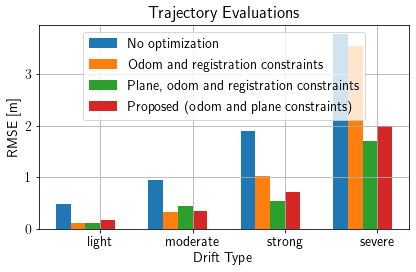

In [4]:
yaml_file_path='/home/ioannis/catkin_ws/src/panoptic_mapping/panoptic_mapping_utils/config/evaluation_scenarios/ablation_study/different_configurations_various_drifts.yaml'
fg = plot_trajectories.plotTrajectoryErrorForManyExperiments(yaml_file_path, labels=['No optimization', 'Odom and registration constraints', 'Plane, odom and registration constraints', '_skip_', 'Proposed (odom and plane constraints)'], use_label_numbers=False)
fg.savefig('/home/ioannis/trajectory_errors3.png')

In [3]:
matplotlib.rcParams.update({'font.size': 22})
yaml_file_path='/home/ioannis/catkin_ws/src/panoptic_mapping/panoptic_mapping_utils/config/evaluation_scenarios/ablation_study/different_configurations_various_drifts.yaml'
all_trajectories = plot_trajectories.getAllExperimentTrajectories(yaml_file_path=yaml_file_path,
                                                                  post_mult=True)

# print(all_trajectories.keys())
# # plot_trajectories.plotFiles(all_trajectories['pm_voxgraph_planes_moderate'], 'home/ioannis/', 'tr_pm_pl.pdf', T_C_R=plot_trajectories.T_C_R, post_mult=True)
# fig1, fig2 = plot_trajectories.plotPerAxisPlusPolarAngles(**all_trajectories['pm_voxgraph_planes_strong'])
# fig3 = plot_trajectories.plotXYZErrorsPerAxis(**all_trajectories['pm_voxgraph_planes_strong'])
# fig1.savefig('/home/ioannis/tr_pm_pl_1_2.pdf')
# fig2.savefig('/home/ioannis/tr_pm_pl_2_2.pdf')
# fig3.savefig('/home/ioannis/tr_pm_pl_3_2.pdf')

/home/ioannis/datasets/different_configurations_various_drifts/experiment19
{'ground_truth_tr': '/home/ioannis/datasets/different_configurations_various_drifts/experiment19/generated_path.txt', 'optimized_tr': '/home/ioannis/datasets/different_configurations_various_drifts/experiment19/trajectory.in', 'voxgraph_tr': '/home/ioannis/datasets/different_configurations_various_drifts/experiment19/voxgraph_traj.bag'}
/home/ioannis/datasets/different_configurations_various_drifts/experiment1
{'ground_truth_tr': '/home/ioannis/datasets/different_configurations_various_drifts/experiment1/generated_path.txt', 'optimized_tr': '/home/ioannis/datasets/different_configurations_various_drifts/experiment1/trajectory.in'}
/home/ioannis/datasets/different_configurations_various_drifts/experiment18
{'ground_truth_tr': '/home/ioannis/datasets/different_configurations_various_drifts/experiment18/generated_path.txt', 'optimized_tr': '/home/ioannis/datasets/different_configurations_various_drifts/experiment1

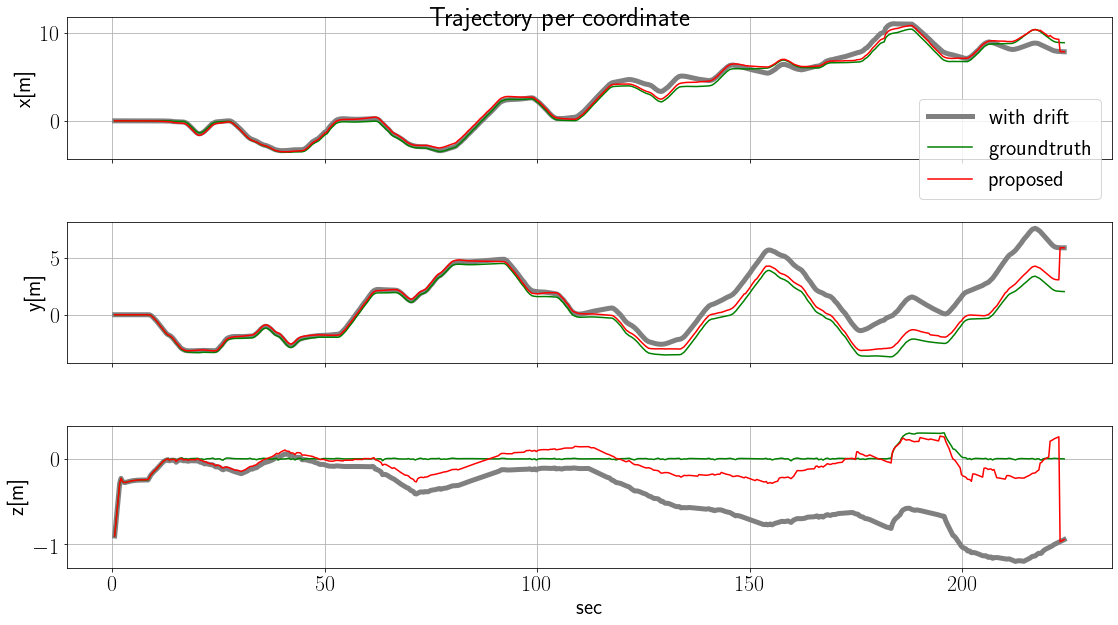

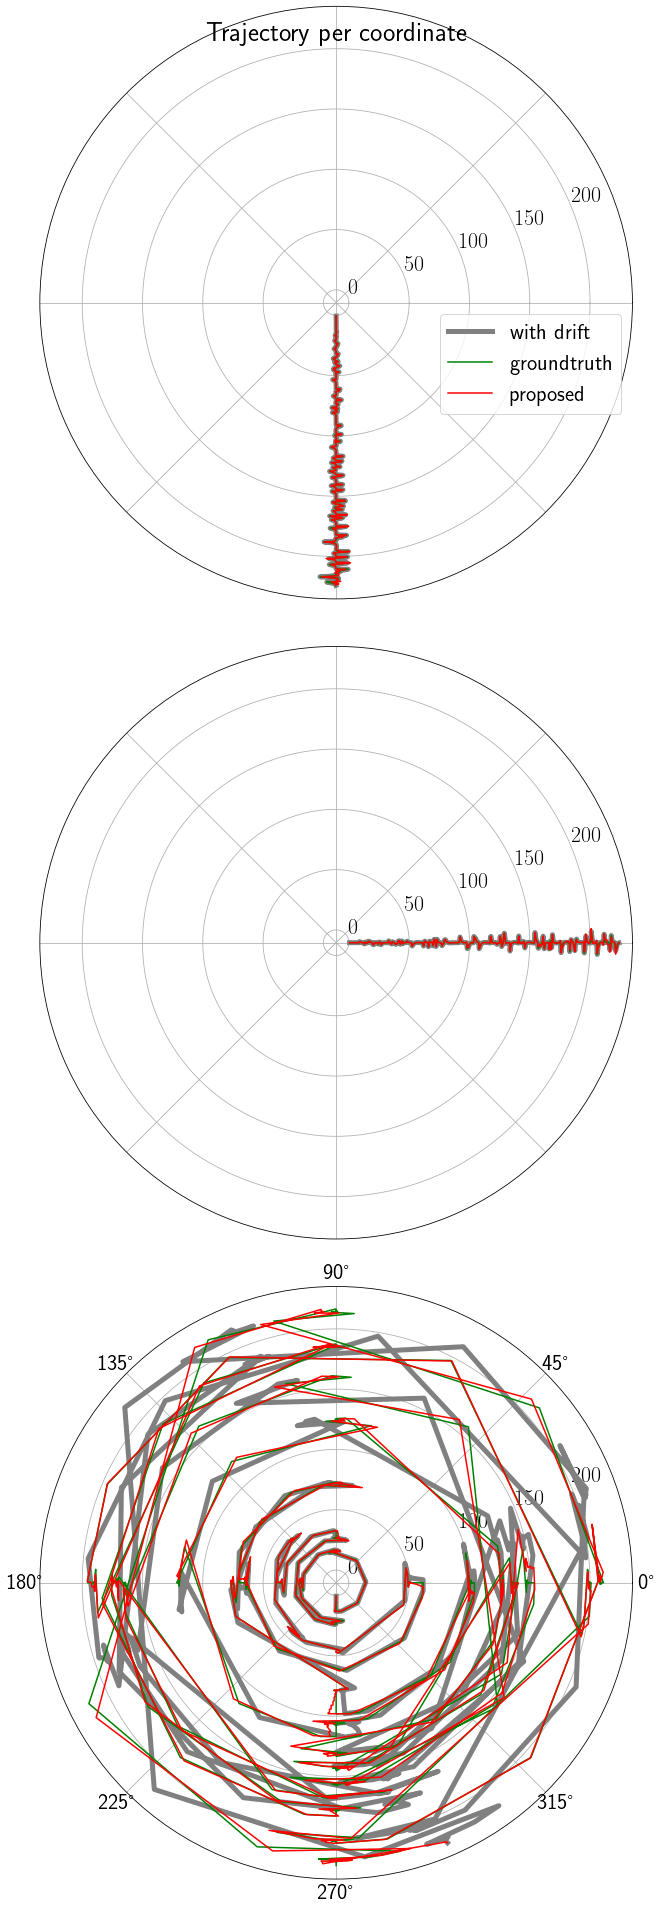

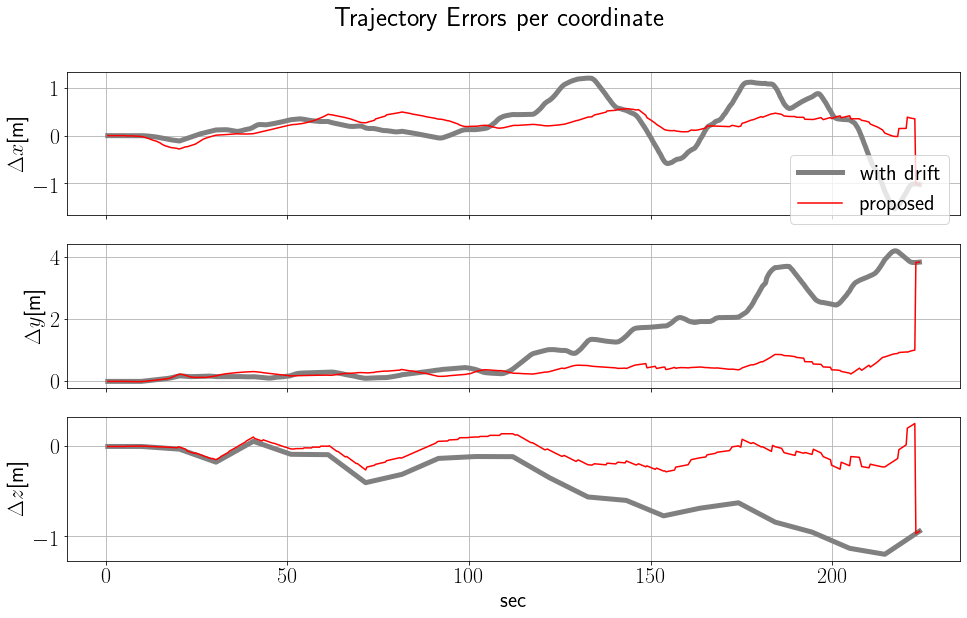

In [5]:
fig1, fig2 = plot_trajectories.plotPerAxisPlusPolarAngles(**all_trajectories['pm_voxgraph_planes_plus_relative_strong'])
d = all_trajectories['pm_voxgraph_planes_plus_relative_strong']
d['voxgraph_tr'] = np.array([])
fig3 = plot_trajectories.plotXYZErrorsPerAxis(**d)
# fig1.savefig('/home/ioannis/tr_pm_pl_rel_1_2.pdf')
# fig2.savefig('/home/ioannis/tr_pm_pl_rel_2_2.pdf')
fig3.savefig('/home/ioannis/tr_pm_pl_rel_3_2.png')

[2022-03-27 18:07:28] - run_evaluations - {line:28} INFO - ['experiment0', 'experiment1', 'experiment2', 'experiment3', 'experiment4', 'experiment5', 'experiment6', 'experiment7']
[2022-03-27 18:07:28] - run_evaluations - {line:52} INFO - opened /home/ioannis/datasets/interpolation_experiments/experiment0/trajectory.out
[2022-03-27 18:07:28] - run_evaluations - {line:63} INFO - opened /home/ioannis/datasets/interpolation_experiments/experiment0/runWithVoxgraph_interpolation_light_none_evaluation_data.csv
[2022-03-27 18:07:28] - run_evaluations - {line:36} INFO - {'trajectory': {'dg_mean_pos[m]': '0.339134', 'dg_mean_rot[rad]': '0.0381651', 'dg_stddev_pos[m]': '0.476154', 'dg_stddev_rot[rad]': '0.0492853', 'dg_rmse_pos[m]': '0.475716', 'dg_rmse_rot[rad]': '0.04924', 'dg_num_points': '544', 'og_mean_pos[m]': '0.0603235', 'og_mean_rot[rad]': '0.00723953', 'og_stddev_pos[m]': '0.106609', 'og_stddev_rot[rad]': '0.0112122', 'og_rmse_pos[m]': '0.106511', 'og_rmse_rot[rad]': '0.0112019', 'og_n

<Figure size 432x288 with 0 Axes>

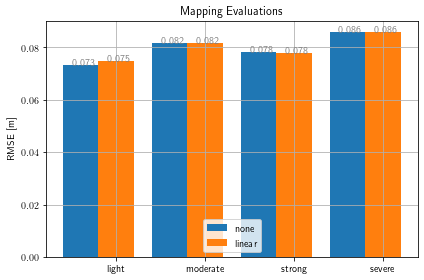

In [19]:
yaml_file_path='/home/ioannis/catkin_ws/src/panoptic_mapping/panoptic_mapping_utils/config/evaluation_scenarios/interpolation_experiments.yaml'
fg = plot_trajectories.plotMappingErrorForManyExperiments(yaml_file_path, labels=['none', 'linear'], error_type='RMSE [m]')
fg.savefig('/home/ioannis/interpolation_mapping_errors.pdf')

[2022-04-14 22:11:31] - run_evaluations - {line:28} INFO - ['experiment0', 'experiment1', 'experiment2', 'experiment3']
[2022-04-14 22:11:31] - run_evaluations - {line:52} INFO - opened /home/ioannis/datasets/voxblox_voxgraph/experiment0/trajectory.out
[2022-04-14 22:11:31] - run_evaluations - {line:36} INFO - {'trajectory': {'dg_mean_pos[m]': '3.61917', 'dg_mean_rot[rad]': '0.837573', 'dg_stddev_pos[m]': '4.69869', 'dg_stddev_rot[rad]': '1.31995', 'dg_rmse_pos[m]': '4.68932', 'dg_rmse_rot[rad]': '1.31732', 'dg_num_points': '204', 'og_mean_pos[m]': '0.0908342', 'og_mean_rot[rad]': '0.0189365', 'og_stddev_pos[m]': '0.103354', 'og_stddev_rot[rad]': '0.0209186', 'og_rmse_pos[m]': '0.103148', 'og_rmse_rot[rad]': '0.0208769', 'og_num_points[m]': '251'}, 'panmap': []}
[2022-04-14 22:11:31] - run_evaluations - {line:52} INFO - opened /home/ioannis/datasets/voxblox_voxgraph/experiment1/trajectory.out
[2022-04-14 22:11:31] - run_evaluations - {line:36} INFO - {'trajectory': {'dg_mean_pos[m]': '

<Figure size 432x288 with 0 Axes>

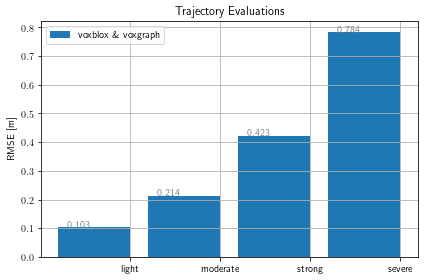

In [7]:
yaml_file_path='/home/ioannis/catkin_ws/src/panoptic_mapping/panoptic_mapping_utils/config/evaluation_scenarios/voxblox_voxgraph.yaml'
fg = plot_trajectories.plotTrajectoryErrorForManyExperiments(yaml_file_path, labels=['voxblox \& voxgraph'], use_label_numbers=True)
fg.savefig('/home/ioannis/vox_vox_errors.pdf')